<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is03_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation

This network is a 2-layer neural network. Specifically, it has the following structure:

Input Layer:
The number of neurons is 2 (representing the two inputs of the AND gate).
The input layer does not have weights or biases; it simply passes the data to the hidden layer.

Hidden Layer:
The network has one hidden layer with 2 neurons.
The sigmoid function is used as the activation function.

Output Layer:
The output layer has 1 neuron, which produces the final prediction (for the AND gate, this will be a value close to 0 or 1).
The sigmoid function is used as the activation function.

Note: The input layer is not counted as a "layer" in this context since it does not involve trainable weights. Hence, only the hidden layer and output layer are counted, making it a 2-layer network.

In [17]:
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Define the activation function (Sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [19]:
# AND gate dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([[0], [0], [0], [1]])              # Outputs (AND gate)

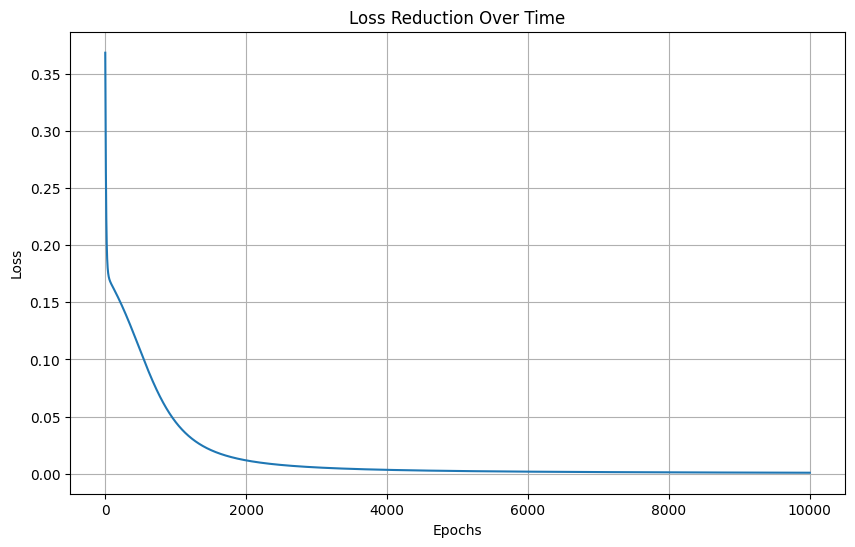

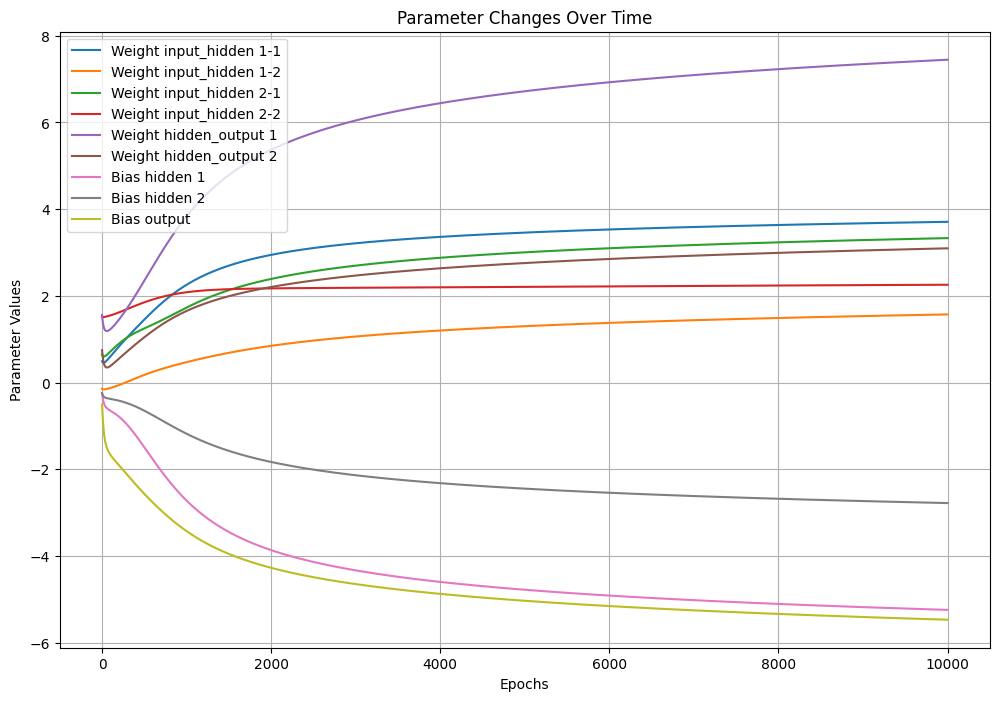

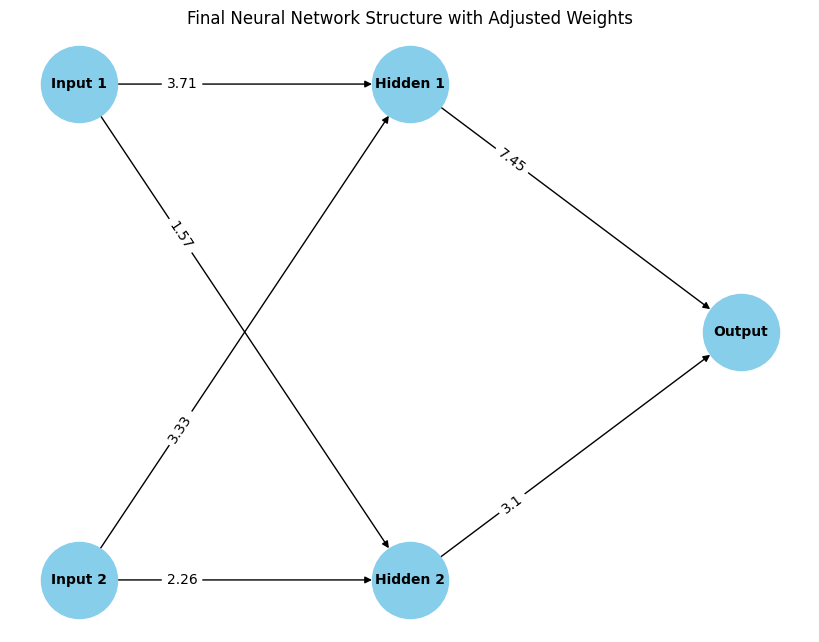

In [21]:
# Initialize the weights and biases randomly
np.random.seed(42)
weights_input_hidden = np.random.randn(2, 2)  # 2 inputs, 2 neurons in hidden layer
bias_hidden = np.random.randn(1, 2)           # Bias for the hidden layer
weights_hidden_output = np.random.randn(2, 1) # 2 neurons in hidden layer, 1 output
bias_output = np.random.randn(1, 1)           # Bias for the output layer

# Hyperparameters
learning_rate = 0.1
epochs = 10000

# Store the loss and parameter changes
loss_history = []
weights_input_hidden_history = []
weights_hidden_output_history = []
bias_hidden_history = []
bias_output_history = []

# Training the neural network using backpropagation
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    y_pred = sigmoid(final_input)

    # Compute the loss (Mean Squared Error)
    loss = np.mean((y - y_pred) ** 2)
    loss_history.append(loss)

    # Backpropagation
    error_output_layer = y_pred - y
    d_output = error_output_layer * sigmoid_derivative(final_input)

    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden_layer * sigmoid_derivative(hidden_layer_input)

    # Update the weights and biases
    weights_hidden_output -= learning_rate * hidden_layer_output.T.dot(d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * X.T.dot(d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    # Store weights and biases for plotting
    weights_input_hidden_history.append(weights_input_hidden.copy())
    weights_hidden_output_history.append(weights_hidden_output.copy())
    bias_hidden_history.append(bias_hidden.copy())
    bias_output_history.append(bias_output.copy())

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Loss Reduction Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Plot parameter changes over epochs
weights_input_hidden_history = np.array(weights_input_hidden_history)
weights_hidden_output_history = np.array(weights_hidden_output_history)
bias_hidden_history = np.array(bias_hidden_history)
bias_output_history = np.array(bias_output_history)

plt.figure(figsize=(12, 8))
for i in range(2):
    plt.plot(weights_input_hidden_history[:, i, 0], label=f'Weight input_hidden {i+1}-1')
    plt.plot(weights_input_hidden_history[:, i, 1], label=f'Weight input_hidden {i+1}-2')
plt.plot(weights_hidden_output_history[:, 0, 0], label='Weight hidden_output 1')
plt.plot(weights_hidden_output_history[:, 1, 0], label='Weight hidden_output 2')
plt.plot(bias_hidden_history[:, 0, 0], label='Bias hidden 1')
plt.plot(bias_hidden_history[:, 0, 1], label='Bias hidden 2')
plt.plot(bias_output_history[:, 0, 0], label='Bias output')
plt.title('Parameter Changes Over Time')
plt.xlabel('Epochs')
plt.ylabel('Parameter Values')
plt.legend()
plt.grid(True)
plt.show()

# Final network structure visualization
import networkx as nx


# Create a graph
G = nx.DiGraph()

# Add nodes
G.add_node("Input 1")
G.add_node("Input 2")
G.add_node("Hidden 1")
G.add_node("Hidden 2")
G.add_node("Output")

# Add edges with weights
G.add_edge("Input 1", "Hidden 1", weight=round(weights_input_hidden[0, 0], 2))
G.add_edge("Input 1", "Hidden 2", weight=round(weights_input_hidden[0, 1], 2))
G.add_edge("Input 2", "Hidden 1", weight=round(weights_input_hidden[1, 0], 2))
G.add_edge("Input 2", "Hidden 2", weight=round(weights_input_hidden[1, 1], 2))
G.add_edge("Hidden 1", "Output", weight=round(weights_hidden_output[0, 0], 2))
G.add_edge("Hidden 2", "Output", weight=round(weights_hidden_output[1, 0], 2))

# Draw the graph
pos = {
    "Input 1": (0, 1), "Input 2": (0, 0),
    "Hidden 1": (1, 1), "Hidden 2": (1, 0),
    "Output": (2, 0.5)
}
labels = nx.get_edge_attributes(G, 'weight')
plt.figure(figsize=(8, 6))

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')

# Draw the edge labels and adjust their positions to avoid overlap
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.3, font_size=10, font_color='black')  # Adjust label_pos

plt.title("Final Neural Network Structure with Adjusted Weights")
plt.show()
